In [1]:
import pandas as pd
import glob

In [2]:
path = r'C:\Users\nikhi\Downloads\RBC Hackathon\WeatherData'
all_files = glob.glob(path + "/*.csv")

In [3]:
df_from_each_file = (pd.read_csv(f) for f in all_files)
weatherData_df   = pd.concat(df_from_each_file, ignore_index=True)

In [5]:
weatherData_df.tail()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
53347,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 19:00,2021,12,31,19:00,3.9,...,NaN,NaN,NaN,101.57,NaN,NaN,NaN,NaN,NaN,NaN
53348,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 20:00,2021,12,31,20:00,4.0,...,NaN,NaN,NaN,101.60,NaN,NaN,NaN,NaN,NaN,NaN
53349,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 21:00,2021,12,31,21:00,4.2,...,NaN,NaN,NaN,101.61,NaN,NaN,NaN,NaN,NaN,NaN
53350,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 22:00,2021,12,31,22:00,4.3,...,NaN,NaN,NaN,101.60,NaN,NaN,NaN,NaN,NaN,NaN
53351,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 23:00,2021,12,31,23:00,4.4,...,NaN,NaN,NaN,101.61,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
solarPower_df = pd.read_csv('C:\\Users\\nikhi\\Downloads\\RBC Hackathon\\Solar_City_Program_-_Solar_Energy_Generation_with_Micro-Inverters.csv')
solarPower_df.tail()

,ObjectId,SYSTEM_ID,DATE,PANELS_REPORTING_MICRO_INVERTER,WATTS,WATT_HOUR,KILOWATT_HOUR,COMMUNITY_NAME,FORWARD_SORTATION_AREA
28830794,28830795,1575841,2021/07/16 20:25:00+00,18,161,13.0,0.013,Halifax,B3M
28830795,28830796,1575841,2021/07/16 20:29:59+00,18,117,10.0,0.010,Halifax,B3M
28830796,28830797,1575841,2021/07/16 20:35:00+00,18,85,7.0,0.007,Halifax,B3M
28830797,28830798,1575841,2021/07/16 20:40:00+00,18,56,5.0,0.005,Halifax,B3M
28830798,28830799,1575841,2021/07/16 20:45:00+00,18,38,3.0,0.003,Halifax,B3M


In [7]:
solarPower_df['DATE'] = pd.to_datetime(solarPower_df['DATE'])
solarPower_df = solarPower_df.groupby([pd.Grouper(freq='H',key='DATE'),'SYSTEM_ID','PANELS_REPORTING_MICRO_INVERTER']).mean().reset_index()

In [8]:
solarPower_df = solarPower_df.sort_values(by = ['SYSTEM_ID','DATE'])
solarPower_df.head()

,DATE,SYSTEM_ID,PANELS_REPORTING_MICRO_INVERTER,ObjectId,WATTS,WATT_HOUR,KILOWATT_HOUR
0,2016-11-02 07:00:00+00:00,1012997,30,6960344.00,12.000000,NaN,NaN
4,2016-11-02 08:00:00+00:00,1012997,30,6960353.75,265.916667,NaN,NaN
7,2016-11-02 09:00:00+00:00,1012997,30,6960372.50,716.384615,NaN,NaN
10,2016-11-02 10:00:00+00:00,1012997,30,6960390.50,1140.818182,NaN,NaN
13,2016-11-02 11:00:00+00:00,1012997,30,6960891.75,3501.250000,NaN,NaN


In [9]:
solarPower_df.WATTS = solarPower_df.WATTS.astype(int)
solarPower_df.to_csv('aggregatedSolarData1.csv',index=False)

In [10]:
weatherData_df.rename(columns={'Date/Time (LST)': 'DATE'}, inplace=True)
weatherData_df.tail()

,Longitude (x),Latitude (y),Station Name,Climate ID,DATE,Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
53347,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 19:00,2021,12,31,19:00,3.9,...,NaN,NaN,NaN,101.57,NaN,NaN,NaN,NaN,NaN,NaN
53348,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 20:00,2021,12,31,20:00,4.0,...,NaN,NaN,NaN,101.60,NaN,NaN,NaN,NaN,NaN,NaN
53349,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 21:00,2021,12,31,21:00,4.2,...,NaN,NaN,NaN,101.61,NaN,NaN,NaN,NaN,NaN,NaN
53350,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 22:00,2021,12,31,22:00,4.3,...,NaN,NaN,NaN,101.60,NaN,NaN,NaN,NaN,NaN,NaN
53351,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 23:00,2021,12,31,23:00,4.4,...,NaN,NaN,NaN,101.61,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
weatherData_df['DATE'] = pd.to_datetime(weatherData_df['DATE'],utc=True)
weatherData_df.tail()

,Longitude (x),Latitude (y),Station Name,Climate ID,DATE,Year,Month,Day,Time (LST),Temp (°C),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
53347,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 19:00:00+00:00,2021,12,31,19:00,3.9,...,NaN,NaN,NaN,101.57,NaN,NaN,NaN,NaN,NaN,NaN
53348,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 20:00:00+00:00,2021,12,31,20:00,4.0,...,NaN,NaN,NaN,101.60,NaN,NaN,NaN,NaN,NaN,NaN
53349,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 21:00:00+00:00,2021,12,31,21:00,4.2,...,NaN,NaN,NaN,101.61,NaN,NaN,NaN,NaN,NaN,NaN
53350,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 22:00:00+00:00,2021,12,31,22:00,4.3,...,NaN,NaN,NaN,101.60,NaN,NaN,NaN,NaN,NaN,NaN
53351,-63.58,44.66,HALIFAX DOCKYARD,8202240,2021-12-31 23:00:00+00:00,2021,12,31,23:00,4.4,...,NaN,NaN,NaN,101.61,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
combined_df = pd.merge(solarPower_df, weatherData_df, on='DATE')

In [15]:
combined_df.head()

,DATE,SYSTEM_ID,PANELS_REPORTING_MICRO_INVERTER,ObjectId,WATTS,WATT_HOUR,KILOWATT_HOUR,Longitude (x),Latitude (y),Station Name,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
0,2016-11-02 07:00:00+00:00,1012997,30,6960344.00,12,NaN,NaN,-63.58,44.66,HALIFAX DOCKYARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-11-02 07:00:00+00:00,1063145,20,7192710.50,0,NaN,NaN,-63.58,44.66,HALIFAX DOCKYARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-11-02 07:00:00+00:00,1068729,11,7433420.00,99,NaN,NaN,-63.58,44.66,HALIFAX DOCKYARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-11-02 07:00:00+00:00,1068729,18,7433424.50,103,NaN,NaN,-63.58,44.66,HALIFAX DOCKYARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-11-02 08:00:00+00:00,1012997,30,6960353.75,265,NaN,NaN,-63.58,44.66,HALIFAX DOCKYARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
combined_df.to_csv('combinedData.csv',index=False)

<AxesSubplot:xlabel='DATE', ylabel='WATTS'>

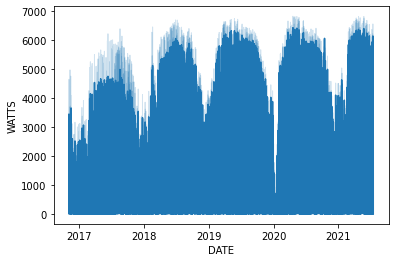

In [23]:
import seaborn as sns
sns.lineplot(data=combined_df, x="DATE", y="WATTS")

In [ ]:
data_df.to_csv('C:\\Users\\nikhi\\Downloads\\RBC Hackathon\\Py\\load_weather_aggregated.csv', index=False)